In [1]:
import joblib
import json
import pandas
import numpy
import seaborn

import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Instructions

- Read **the train data** from the CSV file and properly set the index


,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
495,0.273882,-0.080100,-1.359664,2.0,0.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
296,-0.724523,0.526828,-1.359664,1.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.270692,0.988078,-1.185843,2.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
38,-0.890924,-0.720284,0.117817,2.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
568,2.270692,0.275237,0.465460,3.0,1.0,1.0,3.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.724523,-0.842826,-1.272753,2.0,0.0,1.0,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
192,0.523483,0.252102,0.030907,2.0,1.0,1.0,3.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
630,0.273882,0.159924,-0.664379,2.0,0.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Instructions

- Split the data into a train data set and a validation data set using `sklearn.model_selection.train_test_split` with the following configurations:
```
    train_size   = 0.75
    shuffle      = True 
    random_state = 4
```


In [4]:
data_train

,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
466,0.273882,-0.563401,-0.577468,1.0,1.0,1.0,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
937,-1.223726,-0.417362,-0.490557,1.0,1.0,1.0,3.0,2.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
750,-1.223726,-1.008385,1.160745,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
865,-0.474922,-0.360248,-1.359664,2.0,0.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25,-1.223726,-0.666423,0.030907,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.272287,1.088570,-1.098932,1.0,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
851,0.273882,0.298010,0.639281,3.0,1.0,1.0,2.0,3.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
557,0.024281,0.645394,-0.577468,2.0,1.0,1.0,0.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
9,0.773085,0.728896,-0.664379,0.0,0.0,1.0,3.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
324,-0.225321,-0.791496,0.030907,2.0,0.0,1.0,3.0,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
373,3.269098,3.809443,2.377495,4.0,1.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
393,-1.223726,-0.455679,-0.403647,3.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
854,1.272287,2.768014,0.813103,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.272287,2.832719,-0.490557,2.0,1.0,1.0,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
708,-0.974124,-0.727152,-0.925111,4.0,0.0,1.0,3.0,3.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
829,2.270692,1.251960,0.204728,2.0,1.0,1.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Instructions

- Instantiate a `sklearn.neural_network.MLPClassifier` model with the following configurations
```
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
```


# Instructions

- This part is to train the model while recording the losses and scores of both training and validation data sets
  - For each training iteration, use `partial_fit` to fit the model with the training data
  - Save the model that has the minimum validation loss
- Extend the following code base to append various metrics from partially trained models to `training_results`

```
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = ...
    f1_train = ...
    nll_validation = ...
    f1_validation = ...

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

```

In [8]:
training_results

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
1,0.622768,0.000000,0.624556,0.000000
2,0.622420,0.000000,0.624286,0.000000
3,0.622263,0.000000,0.624190,0.000000
4,0.622136,0.000000,0.624123,0.000000
5,0.622012,0.000000,0.624059,0.000000
...,...,...,...,...
395,0.388156,0.741294,0.680979,0.597222
396,0.387693,0.741294,0.682077,0.597222
397,0.387226,0.741294,0.683181,0.593103


# Instructions

- Plot the `nll_train` and `nll_validation` against `iter`
- Plot the `f1_train` and `f1_validation` against `iter`
- Find the training iteration that achieves the minimum validation loss
  - Hint: use `.idxmin` on `nll_validation`
- Also, use `.get_params`, `json.dump` to save the model configuration to  `./model/config.json`


<Axes: xlabel='iter', ylabel='nll_train'>

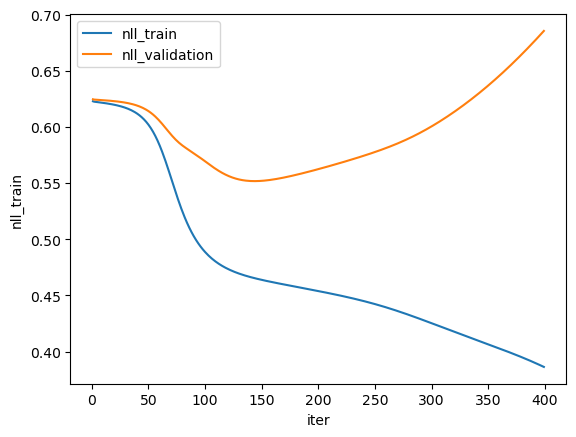

<Axes: xlabel='iter', ylabel='f1_train'>

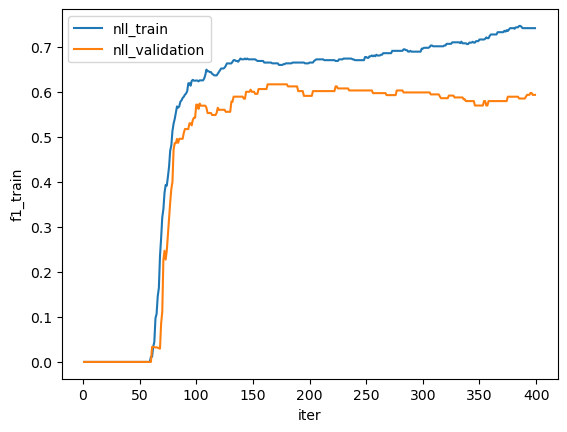

144

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
140,0.466257,0.672087,0.551788,0.589147
141,0.465987,0.672087,0.551744,0.589147
142,0.465722,0.672087,0.551715,0.584615
143,0.465463,0.673854,0.551699,0.584615
144,0.465208,0.672043,0.551698,0.600000
145,0.464959,0.673854,0.551709,0.600000
146,0.464713,0.672043,0.551733,0.600000
147,0.464472,0.672043,0.551769,0.600000
148,0.464235,0.672043,0.551817,0.604651
